In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import lime
from lime import lime_image


2023-09-27 19:23:26.973432: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-27 19:23:27.015737: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-09-27 19:23:27.015782: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-09-27 19:23:27.015810: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-09-27 19:23:27.023498: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-27 19:23:27.024074: I tensorflow/core/platform/cpu_feature_guard.cc:182] This Tens

In [2]:
# Define data directories
# NOTE: Use organise_data.py to create the appropriate things.
train_dir = '/home/caleb/Desktop/p4p/ExplainabilityTool/Datasets/keras_test/train'
validation_dir = '/home/caleb/Desktop/p4p/ExplainabilityTool/Datasets/keras_test/valid'

# Define data generators
train_datagen = ImageDataGenerator(rescale=1.0/255.0)
validation_datagen = ImageDataGenerator(rescale=1.0/255.0)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

# Create a Convolutional Neural Network (CNN) Model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(3, activation='softmax')  # 3 output classes (cats, dogs, pandas)
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the Model
history = model.fit(
    train_generator,
    steps_per_epoch=100,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=50
)


Found 0 images belonging to 3 classes.
Found 0 images belonging to 3 classes.


ValueError: Asked to retrieve element 0, but the Sequence has length 0

In [ ]:
# Explain the Model using LIME
explainer = lime_image.LimeImageExplainer()

# Select an image for explanation
image = validation_generator[0][0][0]  # Replace with the image you want to explain

# Define a function to predict with the model
def predict_fn(images):
    return model.predict(images)

# Explain the prediction
explanation = explainer.explain_instance(image, predict_fn)
explanation.show_in_notebook()


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 173ms/step


  1%|          | 10/1000 [00:00<00:24, 39.97it/s]

1/1 [==============================] - 0s 73ms/step


  2%|▏         | 20/1000 [00:00<00:18, 53.68it/s]

1/1 [==============================] - 0s 78ms/step


  3%|▎         | 30/1000 [00:00<00:15, 60.81it/s]

1/1 [==============================] - 0s 73ms/step


  4%|▍         | 40/1000 [00:00<00:14, 66.20it/s]

1/1 [==============================] - 0s 90ms/step


  5%|▌         | 50/1000 [00:00<00:14, 66.29it/s]

1/1 [==============================] - 0s 75ms/step


  6%|▌         | 60/1000 [00:00<00:13, 68.50it/s]

1/1 [==============================] - 0s 75ms/step


  7%|▋         | 70/1000 [00:01<00:13, 70.94it/s]

1/1 [==============================] - 0s 79ms/step


  8%|▊         | 80/1000 [00:01<00:12, 71.11it/s]

1/1 [==============================] - 0s 74ms/step


  9%|▉         | 90/1000 [00:01<00:12, 73.74it/s]

1/1 [==============================] - 0s 78ms/step


 10%|█         | 100/1000 [00:01<00:12, 74.62it/s]

1/1 [==============================] - 0s 112ms/step


 11%|█         | 110/1000 [00:01<00:12, 69.03it/s]

1/1 [==============================] - 0s 76ms/step


 12%|█▏        | 120/1000 [00:01<00:12, 69.22it/s]

1/1 [==============================] - 0s 76ms/step


 13%|█▎        | 130/1000 [00:01<00:12, 71.23it/s]

1/1 [==============================] - 0s 75ms/step


 14%|█▍        | 140/1000 [00:02<00:11, 73.71it/s]

1/1 [==============================] - 0s 75ms/step


 15%|█▌        | 150/1000 [00:02<00:11, 74.85it/s]

1/1 [==============================] - 0s 75ms/step


 16%|█▌        | 160/1000 [00:02<00:11, 74.82it/s]

1/1 [==============================] - 0s 75ms/step


 17%|█▋        | 170/1000 [00:02<00:11, 74.39it/s]

1/1 [==============================] - 0s 78ms/step


 18%|█▊        | 180/1000 [00:02<00:11, 73.47it/s]

1/1 [==============================] - 0s 73ms/step


 19%|█▉        | 190/1000 [00:02<00:10, 74.15it/s]

1/1 [==============================] - 0s 76ms/step


 20%|██        | 200/1000 [00:02<00:10, 75.45it/s]

1/1 [==============================] - 0s 80ms/step


 21%|██        | 210/1000 [00:02<00:10, 74.60it/s]

1/1 [==============================] - 0s 80ms/step


 22%|██▏       | 220/1000 [00:03<00:10, 73.93it/s]

1/1 [==============================] - 0s 74ms/step


 23%|██▎       | 230/1000 [00:03<00:10, 75.30it/s]

1/1 [==============================] - 0s 77ms/step


 24%|██▍       | 240/1000 [00:03<00:10, 75.55it/s]

1/1 [==============================] - 0s 80ms/step


 25%|██▌       | 250/1000 [00:03<00:09, 76.16it/s]

1/1 [==============================] - 0s 89ms/step


 26%|██▌       | 260/1000 [00:03<00:10, 70.94it/s]

1/1 [==============================] - 0s 76ms/step


 27%|██▋       | 270/1000 [00:03<00:10, 72.42it/s]

1/1 [==============================] - 0s 76ms/step


 28%|██▊       | 280/1000 [00:03<00:09, 72.75it/s]

1/1 [==============================] - 0s 78ms/step


 29%|██▉       | 290/1000 [00:04<00:09, 72.22it/s]

1/1 [==============================] - 0s 81ms/step


 30%|███       | 300/1000 [00:04<00:09, 73.25it/s]

1/1 [==============================] - 0s 77ms/step


 31%|███       | 310/1000 [00:04<00:09, 69.30it/s]

1/1 [==============================] - 0s 77ms/step


 32%|███▏      | 320/1000 [00:04<00:09, 69.29it/s]

1/1 [==============================] - 0s 78ms/step


 33%|███▎      | 330/1000 [00:04<00:09, 71.40it/s]

1/1 [==============================] - 0s 81ms/step


 34%|███▍      | 340/1000 [00:04<00:09, 72.23it/s]

1/1 [==============================] - 0s 80ms/step


 35%|███▌      | 350/1000 [00:04<00:09, 71.40it/s]

1/1 [==============================] - 0s 95ms/step


 36%|███▌      | 360/1000 [00:05<00:09, 69.10it/s]

1/1 [==============================] - 0s 75ms/step


 37%|███▋      | 370/1000 [00:05<00:08, 71.30it/s]

1/1 [==============================] - 0s 91ms/step


 38%|███▊      | 380/1000 [00:05<00:09, 68.37it/s]

1/1 [==============================] - 0s 80ms/step


 39%|███▉      | 390/1000 [00:05<00:08, 70.18it/s]

1/1 [==============================] - 0s 75ms/step


 40%|████      | 400/1000 [00:05<00:08, 71.88it/s]

1/1 [==============================] - 0s 74ms/step


 41%|████      | 410/1000 [00:05<00:07, 74.04it/s]

1/1 [==============================] - 0s 74ms/step


 42%|████▏     | 420/1000 [00:05<00:07, 75.45it/s]

1/1 [==============================] - 0s 76ms/step


 43%|████▎     | 430/1000 [00:06<00:07, 75.58it/s]

1/1 [==============================] - 0s 82ms/step


 44%|████▍     | 440/1000 [00:06<00:07, 72.54it/s]

1/1 [==============================] - 0s 77ms/step


 45%|████▌     | 450/1000 [00:06<00:07, 73.33it/s]

1/1 [==============================] - 0s 78ms/step


 46%|████▌     | 460/1000 [00:06<00:07, 73.02it/s]

1/1 [==============================] - 0s 75ms/step


 47%|████▋     | 470/1000 [00:06<00:07, 74.09it/s]

1/1 [==============================] - 0s 77ms/step


 48%|████▊     | 480/1000 [00:06<00:07, 74.26it/s]

1/1 [==============================] - 0s 85ms/step


 49%|████▉     | 490/1000 [00:06<00:07, 72.25it/s]

1/1 [==============================] - 0s 76ms/step


 50%|█████     | 500/1000 [00:06<00:06, 73.61it/s]

1/1 [==============================] - 0s 79ms/step


 51%|█████     | 510/1000 [00:07<00:06, 74.57it/s]

1/1 [==============================] - 0s 78ms/step


 52%|█████▏    | 520/1000 [00:07<00:06, 73.79it/s]

1/1 [==============================] - 0s 86ms/step


 53%|█████▎    | 530/1000 [00:07<00:06, 69.34it/s]

1/1 [==============================] - 0s 77ms/step


 54%|█████▍    | 540/1000 [00:07<00:06, 70.33it/s]

1/1 [==============================] - 0s 78ms/step


 55%|█████▌    | 550/1000 [00:07<00:06, 70.91it/s]

1/1 [==============================] - 0s 76ms/step


 56%|█████▌    | 560/1000 [00:07<00:06, 73.10it/s]

1/1 [==============================] - 0s 72ms/step


 57%|█████▋    | 570/1000 [00:07<00:05, 73.73it/s]

1/1 [==============================] - 0s 75ms/step


 58%|█████▊    | 580/1000 [00:08<00:05, 75.00it/s]

1/1 [==============================] - 0s 82ms/step


 59%|█████▉    | 590/1000 [00:08<00:05, 74.15it/s]

1/1 [==============================] - 0s 72ms/step


 60%|██████    | 600/1000 [00:08<00:05, 71.81it/s]

1/1 [==============================] - 0s 82ms/step


 61%|██████    | 610/1000 [00:08<00:05, 72.50it/s]

1/1 [==============================] - 0s 88ms/step


 62%|██████▏   | 620/1000 [00:08<00:05, 69.28it/s]

1/1 [==============================] - 0s 82ms/step


 63%|██████▎   | 630/1000 [00:08<00:05, 69.75it/s]

1/1 [==============================] - 0s 81ms/step


 64%|██████▍   | 640/1000 [00:08<00:05, 70.65it/s]

1/1 [==============================] - 0s 83ms/step


 65%|██████▌   | 650/1000 [00:09<00:04, 70.75it/s]

1/1 [==============================] - 0s 76ms/step


 66%|██████▌   | 660/1000 [00:09<00:04, 70.22it/s]

1/1 [==============================] - 0s 105ms/step


 67%|██████▋   | 670/1000 [00:09<00:04, 66.41it/s]

1/1 [==============================] - 0s 79ms/step


 68%|██████▊   | 680/1000 [00:09<00:04, 67.86it/s]

1/1 [==============================] - 0s 79ms/step


 69%|██████▉   | 690/1000 [00:09<00:04, 70.50it/s]

1/1 [==============================] - 0s 89ms/step


 70%|███████   | 700/1000 [00:09<00:04, 68.98it/s]

1/1 [==============================] - 0s 89ms/step


 71%|███████   | 710/1000 [00:09<00:04, 66.44it/s]

1/1 [==============================] - 0s 86ms/step


 72%|███████▏  | 720/1000 [00:10<00:04, 68.04it/s]

1/1 [==============================] - 0s 84ms/step


 73%|███████▎  | 730/1000 [00:10<00:03, 68.67it/s]

1/1 [==============================] - 0s 82ms/step


 74%|███████▍  | 740/1000 [00:10<00:03, 68.25it/s]

1/1 [==============================] - 0s 82ms/step


 75%|███████▌  | 750/1000 [00:10<00:03, 68.47it/s]

1/1 [==============================] - 0s 82ms/step


 76%|███████▌  | 760/1000 [00:10<00:03, 69.07it/s]

1/1 [==============================] - 0s 84ms/step


 77%|███████▋  | 770/1000 [00:10<00:03, 68.66it/s]

1/1 [==============================] - 0s 81ms/step


 78%|███████▊  | 780/1000 [00:10<00:03, 68.16it/s]

1/1 [==============================] - 0s 80ms/step


 79%|███████▉  | 790/1000 [00:11<00:03, 69.36it/s]

1/1 [==============================] - 0s 88ms/step


 80%|████████  | 800/1000 [00:11<00:02, 67.20it/s]

1/1 [==============================] - 0s 91ms/step


 81%|████████  | 810/1000 [00:11<00:03, 62.83it/s]

1/1 [==============================] - 0s 80ms/step


 82%|████████▏ | 820/1000 [00:11<00:02, 65.89it/s]

1/1 [==============================] - 0s 90ms/step


 83%|████████▎ | 830/1000 [00:11<00:02, 66.80it/s]

1/1 [==============================] - 0s 86ms/step


 84%|████████▍ | 840/1000 [00:11<00:02, 66.23it/s]

1/1 [==============================] - 0s 80ms/step


 85%|████████▌ | 850/1000 [00:12<00:02, 66.90it/s]

1/1 [==============================] - 0s 83ms/step


 86%|████████▌ | 860/1000 [00:12<00:02, 68.31it/s]

1/1 [==============================] - 0s 85ms/step


 87%|████████▋ | 870/1000 [00:12<00:01, 68.35it/s]

1/1 [==============================] - 0s 82ms/step


 88%|████████▊ | 880/1000 [00:12<00:01, 67.95it/s]

1/1 [==============================] - 0s 86ms/step


 89%|████████▉ | 890/1000 [00:12<00:01, 67.19it/s]

1/1 [==============================] - 0s 86ms/step


 90%|█████████ | 900/1000 [00:12<00:01, 66.64it/s]

1/1 [==============================] - 0s 76ms/step


 91%|█████████ | 910/1000 [00:12<00:01, 65.86it/s]

1/1 [==============================] - 0s 103ms/step


 92%|█████████▏| 920/1000 [00:13<00:01, 63.90it/s]

1/1 [==============================] - 0s 81ms/step


 93%|█████████▎| 930/1000 [00:13<00:01, 65.91it/s]

1/1 [==============================] - 0s 82ms/step


 94%|█████████▍| 940/1000 [00:13<00:00, 67.43it/s]

1/1 [==============================] - 0s 89ms/step


 95%|█████████▌| 950/1000 [00:13<00:00, 67.60it/s]

1/1 [==============================] - 0s 117ms/step


 96%|█████████▌| 960/1000 [00:13<00:00, 64.22it/s]

1/1 [==============================] - 0s 93ms/step


 97%|█████████▋| 970/1000 [00:13<00:00, 63.59it/s]

1/1 [==============================] - 0s 94ms/step


 98%|█████████▊| 980/1000 [00:14<00:00, 64.28it/s]

1/1 [==============================] - 0s 79ms/step


 99%|█████████▉| 990/1000 [00:14<00:00, 65.05it/s]

1/1 [==============================] - 0s 81ms/step


100%|██████████| 1000/1000 [00:14<00:00, 69.83it/s]


AttributeError: 'ImageExplanation' object has no attribute 'show_in_notebook'

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 73ms/step


  1%|          | 10/1000 [00:00<00:14, 70.55it/s]

1/1 [==============================] - 0s 80ms/step


  2%|▏         | 20/1000 [00:00<00:13, 70.23it/s]

1/1 [==============================] - 0s 75ms/step


  3%|▎         | 30/1000 [00:00<00:13, 69.64it/s]

1/1 [==============================] - 0s 76ms/step


  4%|▍         | 40/1000 [00:00<00:13, 71.67it/s]

1/1 [==============================] - 0s 74ms/step


  5%|▌         | 50/1000 [00:00<00:12, 73.16it/s]

1/1 [==============================] - 0s 80ms/step


  6%|▌         | 60/1000 [00:00<00:12, 73.47it/s]

1/1 [==============================] - 0s 91ms/step


  7%|▋         | 70/1000 [00:00<00:13, 70.47it/s]

1/1 [==============================] - 0s 82ms/step


  8%|▊         | 80/1000 [00:01<00:12, 71.06it/s]

1/1 [==============================] - 0s 84ms/step


  9%|▉         | 90/1000 [00:01<00:12, 71.23it/s]

1/1 [==============================] - 0s 77ms/step


 10%|█         | 100/1000 [00:01<00:12, 70.16it/s]

1/1 [==============================] - 0s 107ms/step


 11%|█         | 110/1000 [00:01<00:13, 63.90it/s]

1/1 [==============================] - 0s 78ms/step


 12%|█▏        | 120/1000 [00:01<00:13, 67.34it/s]

1/1 [==============================] - 0s 86ms/step


 13%|█▎        | 130/1000 [00:01<00:12, 67.79it/s]

1/1 [==============================] - 0s 77ms/step


 14%|█▍        | 140/1000 [00:02<00:12, 69.87it/s]

1/1 [==============================] - 0s 75ms/step


 15%|█▌        | 150/1000 [00:02<00:11, 71.66it/s]

1/1 [==============================] - 0s 77ms/step


 16%|█▌        | 160/1000 [00:02<00:11, 73.45it/s]

1/1 [==============================] - 0s 76ms/step


 17%|█▋        | 170/1000 [00:02<00:11, 74.78it/s]

1/1 [==============================] - 0s 75ms/step


 18%|█▊        | 180/1000 [00:02<00:10, 75.85it/s]

1/1 [==============================] - 0s 76ms/step


 19%|█▉        | 190/1000 [00:02<00:10, 76.24it/s]

1/1 [==============================] - 0s 77ms/step


 20%|██        | 200/1000 [00:02<00:10, 74.92it/s]

1/1 [==============================] - 0s 87ms/step


 21%|██        | 210/1000 [00:02<00:10, 73.73it/s]

1/1 [==============================] - 0s 77ms/step


 22%|██▏       | 220/1000 [00:03<00:10, 72.97it/s]

1/1 [==============================] - 0s 82ms/step


 23%|██▎       | 230/1000 [00:03<00:11, 68.35it/s]

1/1 [==============================] - 0s 85ms/step


 24%|██▍       | 240/1000 [00:03<00:10, 69.20it/s]

1/1 [==============================] - 0s 79ms/step


 25%|██▌       | 250/1000 [00:03<00:10, 71.33it/s]

1/1 [==============================] - 0s 76ms/step


 26%|██▌       | 260/1000 [00:03<00:10, 71.74it/s]

1/1 [==============================] - 0s 72ms/step


 27%|██▋       | 270/1000 [00:03<00:10, 72.09it/s]

1/1 [==============================] - 0s 84ms/step


 28%|██▊       | 280/1000 [00:03<00:10, 71.42it/s]

1/1 [==============================] - 0s 75ms/step


 29%|██▉       | 290/1000 [00:04<00:09, 71.35it/s]

1/1 [==============================] - 0s 82ms/step


 30%|███       | 300/1000 [00:04<00:09, 71.88it/s]

1/1 [==============================] - 0s 85ms/step


 31%|███       | 310/1000 [00:04<00:09, 70.49it/s]

1/1 [==============================] - 0s 84ms/step


 32%|███▏      | 320/1000 [00:04<00:09, 68.07it/s]

1/1 [==============================] - 0s 82ms/step


 33%|███▎      | 330/1000 [00:04<00:09, 67.71it/s]

1/1 [==============================] - 0s 76ms/step


 34%|███▍      | 340/1000 [00:04<00:09, 68.51it/s]

1/1 [==============================] - 0s 82ms/step


 35%|███▌      | 350/1000 [00:04<00:09, 69.81it/s]

1/1 [==============================] - 0s 80ms/step


 36%|███▌      | 360/1000 [00:05<00:09, 69.80it/s]

1/1 [==============================] - 0s 82ms/step


 37%|███▋      | 370/1000 [00:05<00:09, 69.68it/s]

1/1 [==============================] - 0s 81ms/step


 38%|███▊      | 380/1000 [00:05<00:09, 64.98it/s]

1/1 [==============================] - 0s 101ms/step


 39%|███▉      | 390/1000 [00:05<00:09, 61.07it/s]

1/1 [==============================] - 0s 84ms/step


 40%|████      | 400/1000 [00:05<00:09, 61.71it/s]

1/1 [==============================] - 0s 91ms/step


 41%|████      | 410/1000 [00:05<00:09, 62.84it/s]

1/1 [==============================] - 0s 85ms/step


 42%|████▏     | 420/1000 [00:06<00:09, 63.12it/s]

1/1 [==============================] - 0s 89ms/step


 43%|████▎     | 430/1000 [00:06<00:08, 63.91it/s]

1/1 [==============================] - 0s 98ms/step


 44%|████▍     | 440/1000 [00:06<00:09, 61.33it/s]

1/1 [==============================] - 0s 88ms/step


 45%|████▌     | 450/1000 [00:06<00:08, 61.55it/s]

1/1 [==============================] - 0s 90ms/step


 46%|████▌     | 460/1000 [00:06<00:08, 63.53it/s]

1/1 [==============================] - 0s 89ms/step


 47%|████▋     | 470/1000 [00:06<00:08, 60.93it/s]

1/1 [==============================] - 0s 111ms/step


 48%|████▊     | 480/1000 [00:07<00:08, 57.83it/s]

1/1 [==============================] - 0s 84ms/step


 49%|████▉     | 490/1000 [00:07<00:08, 61.10it/s]

1/1 [==============================] - 0s 72ms/step


 50%|█████     | 500/1000 [00:07<00:07, 62.79it/s]

1/1 [==============================] - 0s 85ms/step


 51%|█████     | 510/1000 [00:07<00:07, 63.93it/s]

1/1 [==============================] - 0s 104ms/step


 52%|█████▏    | 520/1000 [00:07<00:07, 60.62it/s]

1/1 [==============================] - 0s 103ms/step


 53%|█████▎    | 530/1000 [00:07<00:08, 57.05it/s]

1/1 [==============================] - 0s 77ms/step


 54%|█████▍    | 540/1000 [00:08<00:07, 60.19it/s]

1/1 [==============================] - 0s 77ms/step


 55%|█████▌    | 550/1000 [00:08<00:06, 65.08it/s]

1/1 [==============================] - 0s 74ms/step


 56%|█████▌    | 560/1000 [00:08<00:06, 68.55it/s]

1/1 [==============================] - 0s 72ms/step


 57%|█████▋    | 570/1000 [00:08<00:06, 69.95it/s]

1/1 [==============================] - 0s 82ms/step


 58%|█████▊    | 580/1000 [00:08<00:06, 69.85it/s]

1/1 [==============================] - 0s 73ms/step


 59%|█████▉    | 590/1000 [00:08<00:05, 72.94it/s]

1/1 [==============================] - 0s 80ms/step


 60%|██████    | 600/1000 [00:08<00:05, 73.75it/s]

1/1 [==============================] - 0s 87ms/step


 61%|██████    | 610/1000 [00:08<00:05, 69.49it/s]

1/1 [==============================] - 0s 114ms/step


 62%|██████▏   | 620/1000 [00:09<00:06, 62.93it/s]

1/1 [==============================] - 0s 86ms/step


 63%|██████▎   | 630/1000 [00:09<00:05, 62.56it/s]

1/1 [==============================] - 0s 87ms/step


 64%|██████▍   | 640/1000 [00:09<00:05, 62.42it/s]

1/1 [==============================] - 0s 86ms/step


 65%|██████▌   | 650/1000 [00:09<00:05, 62.03it/s]

1/1 [==============================] - 0s 77ms/step


 66%|██████▌   | 660/1000 [00:09<00:05, 61.79it/s]

1/1 [==============================] - 0s 83ms/step


 67%|██████▋   | 670/1000 [00:09<00:05, 64.30it/s]

1/1 [==============================] - 0s 80ms/step


 68%|██████▊   | 680/1000 [00:10<00:04, 67.26it/s]

1/1 [==============================] - 0s 75ms/step


 69%|██████▉   | 690/1000 [00:10<00:04, 69.10it/s]

1/1 [==============================] - 0s 78ms/step


 70%|███████   | 700/1000 [00:10<00:04, 69.99it/s]

1/1 [==============================] - 0s 75ms/step


 71%|███████   | 710/1000 [00:10<00:04, 70.74it/s]

1/1 [==============================] - 0s 83ms/step


 72%|███████▏  | 720/1000 [00:10<00:03, 70.85it/s]

1/1 [==============================] - 0s 84ms/step


 73%|███████▎  | 730/1000 [00:10<00:03, 71.82it/s]

1/1 [==============================] - 0s 83ms/step


 74%|███████▍  | 740/1000 [00:10<00:03, 71.41it/s]

1/1 [==============================] - 0s 75ms/step


 75%|███████▌  | 750/1000 [00:11<00:03, 71.52it/s]

1/1 [==============================] - 0s 75ms/step


 76%|███████▌  | 760/1000 [00:11<00:03, 72.36it/s]

1/1 [==============================] - 0s 94ms/step


 77%|███████▋  | 770/1000 [00:11<00:03, 68.31it/s]

1/1 [==============================] - 0s 103ms/step


 78%|███████▊  | 780/1000 [00:11<00:03, 63.99it/s]

1/1 [==============================] - 0s 78ms/step


 79%|███████▉  | 790/1000 [00:11<00:03, 62.48it/s]

1/1 [==============================] - 0s 75ms/step


 80%|████████  | 800/1000 [00:11<00:03, 65.43it/s]

1/1 [==============================] - 0s 80ms/step


 81%|████████  | 810/1000 [00:11<00:02, 68.11it/s]

1/1 [==============================] - 0s 79ms/step


 82%|████████▏ | 820/1000 [00:12<00:02, 68.09it/s]

1/1 [==============================] - 0s 76ms/step


 83%|████████▎ | 830/1000 [00:12<00:02, 68.29it/s]

1/1 [==============================] - 0s 77ms/step


 84%|████████▍ | 840/1000 [00:12<00:02, 69.04it/s]

1/1 [==============================] - 0s 78ms/step


 85%|████████▌ | 850/1000 [00:12<00:02, 69.80it/s]

1/1 [==============================] - 0s 78ms/step


 86%|████████▌ | 860/1000 [00:12<00:02, 69.86it/s]

1/1 [==============================] - 0s 85ms/step


 87%|████████▋ | 870/1000 [00:12<00:01, 67.95it/s]

1/1 [==============================] - 0s 84ms/step


 88%|████████▊ | 880/1000 [00:13<00:01, 67.17it/s]

1/1 [==============================] - 0s 86ms/step


 89%|████████▉ | 890/1000 [00:13<00:01, 67.17it/s]

1/1 [==============================] - 0s 95ms/step


 90%|█████████ | 900/1000 [00:13<00:01, 61.59it/s]

1/1 [==============================] - 0s 137ms/step


 91%|█████████ | 910/1000 [00:13<00:01, 56.99it/s]

1/1 [==============================] - 0s 83ms/step


 92%|█████████▏| 920/1000 [00:13<00:01, 58.30it/s]

1/1 [==============================] - 0s 97ms/step


 93%|█████████▎| 930/1000 [00:13<00:01, 59.52it/s]

1/1 [==============================] - 0s 80ms/step


 94%|█████████▍| 940/1000 [00:14<00:00, 61.01it/s]

1/1 [==============================] - 0s 75ms/step


 95%|█████████▌| 950/1000 [00:14<00:00, 65.36it/s]

1/1 [==============================] - 0s 85ms/step


 96%|█████████▌| 960/1000 [00:14<00:00, 66.58it/s]

1/1 [==============================] - 0s 91ms/step


 97%|█████████▋| 970/1000 [00:14<00:00, 63.58it/s]

1/1 [==============================] - 0s 89ms/step


 98%|█████████▊| 980/1000 [00:14<00:00, 63.58it/s]

1/1 [==============================] - 0s 86ms/step


 99%|█████████▉| 990/1000 [00:14<00:00, 63.90it/s]

1/1 [==============================] - 0s 89ms/step


100%|██████████| 1000/1000 [00:14<00:00, 66.77it/s]


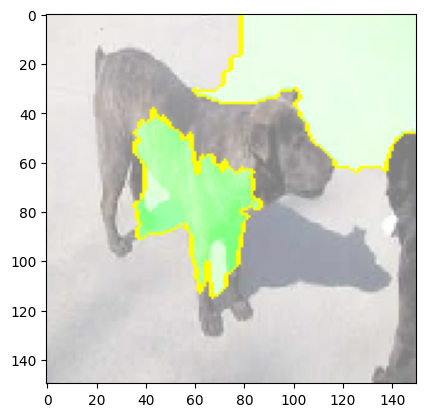

In [ ]:
# Explain the Model using LIME
from lime import lime_image
from skimage.segmentation import mark_boundaries
import matplotlib.pyplot as plt

explainer = lime_image.LimeImageExplainer(verbose=False)

# Select an image for explanation (replace this with the image you want to explain)
image = validation_generator[0][0][0]

# Define a function to predict with the model
def predict_fn(images):
    return model.predict(images)

# Explain the prediction
explanation = explainer.explain_instance(image, predict_fn, top_labels=5, hide_color=0, num_samples=1000)

# Display the explanation for the top class (Black Bear)


temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=10, hide_rest=False, min_weight=0.01)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))



In [ ]:
model.save("first_keras_test.h5") # Use a better name :P

/home/caleb/Desktop/p4p/ExplainabilityTool/p4p/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


TypeError: save_model() got an unexpected keyword argument 'compile'

In [ ]:
import tensorflow as tf

# Load the saved model
loaded_model = tf.keras.models.load_model("keras_model1.h5") # Make sure to change the names or paths
loaded_model2 = tf.keras.models.load_model("first_keras_test.h5")
# Print the model summary
loaded_model.summary()
loaded_model2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 1280)              410208    
                                                                 
 sequential_3 (Sequential)   (None, 3)                 128400    
                                                                 
Total params: 538608 (2.05 MB)
Trainable params: 524528 (2.00 MB)
Non-trainable params: 14080 (55.00 KB)
_________________________________________________________________
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                          